# IMPORTANDO AS BIBLIOTECAS E CRIANDO FUNÇÕES SHAREDS

In [30]:
#importando bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()
import warnings
warnings.filterwarnings('ignore')

def dia():
    from datetime import date, timedelta
    dia = date.today() + timedelta(0)
    return dia

def drop_reset_index(df):
    df = df.dropna()
    df = df.reset_index(drop=True)
    df.index += 1
    return df

def grafico(df, nome):
    df = df.reset_index(drop=True)
    df.index += 1
    df['Profit_acu'] = df.Profit.cumsum()
    profit = round(df.Profit_acu.tail(1).item(),2)
    ROI = round((df.Profit_acu.tail(1)/len(df)*100).item(),2)
    df.Profit_acu.plot(title=nome, xlabel='Entradas', ylabel='Stakes')
    print("Profit:",profit,"stakes em", len(df),"jogos")
    print("ROI:",ROI,"%")

# IMPORTANDO A TABELA DAS ÚLTIMAS 3 TEMPORADAS

In [2]:
# ESPANHA - LA LIGA
df = pd.read_excel('https://github.com/LeonardoTostes90/ApostasEsportivas/blob/main/Temporadas/3_Ultimas_Temporadas_Espanha1.xlsx?raw=true')

# Ajustando o Índice do DataFrame
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
df = df.dropna()

#EXEMPLOS DE TIMES DA LALIGA

In [3]:
# team = "Sao Paulo"
# df1 = df.groupby(['Home']).get_group(team)
# df2 = df1[['Home','Away','Goals_H','Goals_A','Result','Media_Valor_do_Gol_H','Media_Valor_do_Gol_A','Media_Custo_do_Gol_H','Media_Custo_do_Gol_A']]
# df2.tail(5)

# team = "Barcelona"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# team = "Real Madrid"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# team = "Atlético Madrid"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# team = "Real Sociedad"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# team = "Villarreal"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# team = "Betis"
# df0 = df.groupby(['Home']).get_group(team)
# df0 = df0.tail(6)
# df0

# Criando as Colunas Over25 e Under25

In [4]:
# Over 2.5
df.loc[((df['Total_Gols_H'] + df['Total_Gols_A']) > 2), 'Over25'] = 1
df.loc[((df['Total_Gols_H'] + df['Total_Gols_A']) < 3), 'Over25'] = 0

# Under 2.5
df.loc[((df['Total_Gols_H'] + df['Total_Gols_A']) < 3), 'Under25'] = 1
df.loc[((df['Total_Gols_H'] + df['Total_Gols_A']) > 2), 'Under25'] = 0

# Selecionando o Filtro Estatístico e Criando o Gráfico

Nº
663    230.13
Name: Profit_acu_Under25, dtype: float64

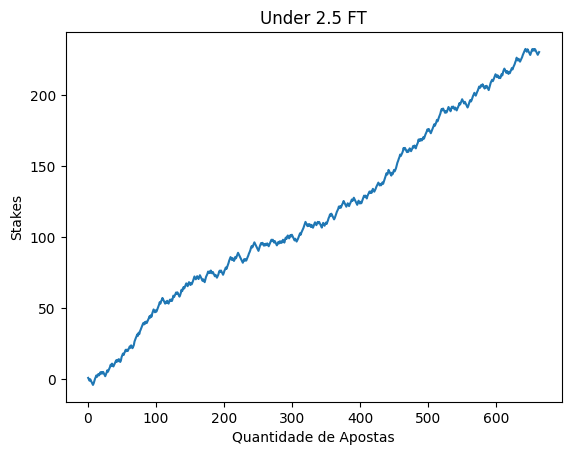

In [6]:
# Selecionando o Filtro Estatítisco
flt = (df.Odd_Over25 >= 1.91)
df2 = df[flt];

# Ajustando o Índice
df2.reset_index(inplace=True, drop=True)
df2.index = df2.index.set_names(['Nº'])
df2 = df2.rename(index=lambda x: x + 1)

Stake = 1

# green_resultadoHome = Stake * (df.Odd_H - 1)
# red_resultadoHome = -Stake

# green_resultadoAway = Stake * (df.Odd_A - 1)
# red_resultadoAway = -Stake

# green_over25 = Stake * (df.Odd_Over25 - 1)
# red_over25 = -Stake

# green_under25 = Stake * (df.Odd_Under25 - 1)
# red_under25 = -Stake

# # Resultado Home
# df.loc[df['Resultado'] == 'H', 'Profit_ResultadoHome'] = green_resultadoHome
# df.loc[df['Resultado'] != "H", 'Profit_ResultadoHome'] = red_resultadoHome
# df['Profit_acu_ResultadoHome'] = df.Profit_ResultadoHome.cumsum()
# df.Profit_acu_ResultadoHome.plot(title='Resultado Home', xlabel='Quantidade de Apostas', ylabel='Stakes')
# df.Profit_acu_ResultadoHome.tail(1)

# # Resultado Away
# df.loc[df['Resultado'] == 'A', 'Profit_ResultadoAway'] = green_resultadoAway
# df.loc[df['Resultado'] != "A", 'Profit_ResultadoAway'] = red_resultadoAway
# df['Profit_acu_ResultadoAway'] = df.Profit_ResultadoAway.cumsum()
# df.Profit_acu_ResultadoAway.plot(title='Resultado Away', xlabel='Quantidade de Apostas', ylabel='Stakes')
# df.Profit_acu_ResultadoAway.tail(1)

# # Over 2.5 FT
# df.loc[((df['Over25']) == 1), 'Profit_Over25'] = green_over25
# df.loc[((df['Over25']) == 0), 'Profit_Over25'] = red_over25
# df['Profit_acu_Over25'] = df.Profit_Over25.cumsum()
# df.Profit_acu_Over25.plot(title='Over 2.5 FT', xlabel='Quantidade de Apostas', ylabel='Stakes')
# df.Profit_acu_Over25.tail(1)

# Under 2.5 FT
# df.loc[((df['Under25']) == 1), 'Profit_Under25'] = 1 * (df.Odd_Under25 - 1)
# df.loc[((df['Under25']) == 0), 'Profit_Under25'] = -1
df2['Profit_acu_Under25'] = df2.Profit_Under.cumsum()
df2.Profit_acu_Under25.plot(title='Under 2.5 FT', xlabel='Quantidade de Apostas', ylabel='Stakes')
df2.Profit_acu_Under25.tail(1)



# Calculando o ROI

In [7]:
ROI = df2.Profit_acu_Under25.tail(1)/len(df)*100
ROI

Nº
663    24.378178
Name: Profit_acu_Under25, dtype: float64

# Importando os Jogos do Dia da Liga em Análise

In [32]:
# IMPORTANDO OS JOGOS DO DIA
jogos_do_dia = pd.read_csv('https://github.com/futpythontrader/YouTube/blob/main/Jogos_do_Dia_Betfair/'+str(dia())+'_Jogos_do_Dia.csv?raw=true')
#https://github.com/futpythontrader/YouTube/blob/main/Jogos_do_Dia_Betfair/'+str(Date)+'_FutPythonTrader_Jogos_do_Dia.xlsx?raw=true')

In [ ]:
ligas = jogos_do_dia.sort_values(['League'])
ligas = ligas['League'].unique()
ligas

In [10]:
liga = 'Spanish La Liga'

In [ ]:
flt = jogos_do_dia.League == liga
df_liga = jogos_do_dia[flt]
df_liga

# Concatenando os Jogos do Dia com o DataFrame importado anteriormente

In [12]:
# CONCATENANDO OS JOGOS DO DIA COM A BASE DE DADOS
df_H = df[['Home','Media_ValorGol_H','CoeficienteVariacao_ValorGol_H','Media_CustoGol_H','CoeficienteVariacao_CustoGol_H']]
df_A = df[['Away','Media_ValorGol_A','CoeficienteVariacao_ValorGol_A','Media_CustoGol_A','CoeficienteVariacao_CustoGol_A']]

In [ ]:
lista = []

for a,b,c,d,e,f,g,h,i in zip(jogos_do_dia.League,
                           jogos_do_dia.Date,
                           jogos_do_dia.Home,
                           jogos_do_dia.Away,
                           jogos_do_dia.Odd_H,
                           jogos_do_dia.Odd_D,
                           jogos_do_dia.Odd_A,
                           jogos_do_dia.Odd_Over25,
                           jogos_do_dia.Odd_Under25):
    try:
        League = a
        Date = b
        Home = c
        Away = d
        Odd_H = e
        Odd_D = f
        Odd_A = g
        Odd_Over25 = h
        Odd_Under25 = i

        df1 = df_H[df_H.Home == Home].tail(1)

        df2 = df_A[df_A.Away == Away].tail(1)

        jogo = {}

        jogo["League"] = League
        jogo["Date"] = Date
        jogo["Home"] = Home
        jogo["Away"] = Away
        jogo["Odd_H"] = Odd_H
        jogo["Odd_D"] = Odd_D
        jogo["Odd_A"] = Odd_A
        jogo["Odd_Over25"] = Odd_Over25
        jogo["Odd_Under25"] = Odd_Under25
        jogo["Total_Gols_H"] = df1[df1.Home == Home]['Media_ValorGol_H'].iloc[0]
        jogo["Total_Gols_A"] = df2[df2.Away == Away]['Media_ValorGol_A'].iloc[0]
        jogo["Media_ValorGol_H"] = df1[df1.Home == Home]['Media_ValorGol_H'].iloc[0]
        jogo["Media_ValorGol_A"] = df2[df2.Away == Away]['Media_ValorGol_A'].iloc[0]
        jogo["CoeficienteVariacao_ValorGol_H"] = df1[df1.Home == Home]['CoeficienteVariacao_ValorGol_H'].iloc[0]
        jogo["CoeficienteVariacao_ValorGol_A"] = df2[df2.Away == Away]['CoeficienteVariacao_ValorGol_A'].iloc[0]
        jogo["Media_CustoGol_H"] = df1[df1.Home == Home]['Media_CustoGol_H'].iloc[0]
        jogo["Media_CustoGol_A"] = df2[df2.Away == Away]['Media_CustoGol_A'].iloc[0]
        jogo["CoeficienteVariacao_CustoGol_H"] = df1[df1.Home == Home]['CoeficienteVariacao_CustoGol_H'].iloc[0]
        jogo["CoeficienteVariacao_CustoGol_A"] = df2[df2.Away == Away]['CoeficienteVariacao_CustoGol_A'].iloc[0]

        lista.append(jogo)

    except:
        pass

df = pd.DataFrame(lista)
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
df

# Aplicando o Filtro Estatístico nos jogos do dia

In [14]:
filtro = (
# Odds do Over 2.5
(df.Odd_Over25 >= 1.91)
)

Entradas = df[filtro]
Entradas.reset_index(inplace=True, drop=True)
Entradas.index = Entradas.index.set_names(['Nº'])
Entradas = Entradas.rename(index=lambda x: x + 1)

# ENTRADAS A SEREM REALIZADAS

In [15]:
Entradas

,League,Date,Home,Away,Odd_H,Odd_D,Odd_A,Odd_Over25,Odd_Under25,Total_Gols_H,Total_Gols_A,Media_ValorGol_H,Media_ValorGol_A,CoeficienteVariacao_ValorGol_H,CoeficienteVariacao_ValorGol_A,Media_CustoGol_H,Media_CustoGol_A,CoeficienteVariacao_CustoGol_H,CoeficienteVariacao_CustoGol_A
Nº,,,,,,,,,,,,,,,,,,,
1,Spanish La Liga,2023-05-20,Getafe,Elche,1.52,4.30,8.6,2.32,1.70,0.235654,0.209290,0.235654,0.209290,1.591384,1.226754,0.339891,0.227214,0.607717,0.073446
2,Spanish La Liga,2023-05-20,Almeria,Mallorca,2.32,3.45,3.5,2.24,1.74,0.592149,0.512692,0.592149,0.512692,0.411613,1.104473,0.277323,0.180649,0.455252,0.626830
